<a href="https://colab.research.google.com/github/27286662/Mec-de-la-particula/blob/main/Mec_de_la_particula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=green size=10>Mecánica de la Partícula - PARTE 1</font>
***
- <font color=gold size=6 > Cinemática </font>


## 1.0 Import necesary Libraries
- Note: Visit here: https://www.w3schools.com/colors/colors_picker.asp, if you want to choose a different color fot the text

In [64]:
# Libraries for numerical operations and data handling
import numpy as np  # Used for numerical computations and array operations
import pandas as pd  # Used for handling and analyzing tabular data

# Libraries for plotting
import matplotlib.pyplot as plt  # Used to create static, animated, and interactive plots
import seaborn as sns  # Enhances matplotlib plots with better styling and statistical visualization tools

# Library for interacting with the operating system
import os  # Used for file and directory management (e.g., reading/writing files, path handling)

# Libraries for symbolic mathematics and solving equations
import sympy as sp  # Used for symbolic algebra, differentiation, and equation solving
from scipy.optimize import fsolve  # Used for finding numerical solutions to equations

# Library for displaying LaTeX-formatted equations in Jupyter/Colab
from IPython.display import display, Math  # Used to display equations in LaTeX format

<font color=green size=5> 2.0 EXAMPLE: Let's write de following position function </font>
***

$$
x(t) =  t^{3} - 6t^{2} - 15 t + 40
$$

- And now lets plot to visualized it and create a data frame to see the values tht the position has with respect to time:

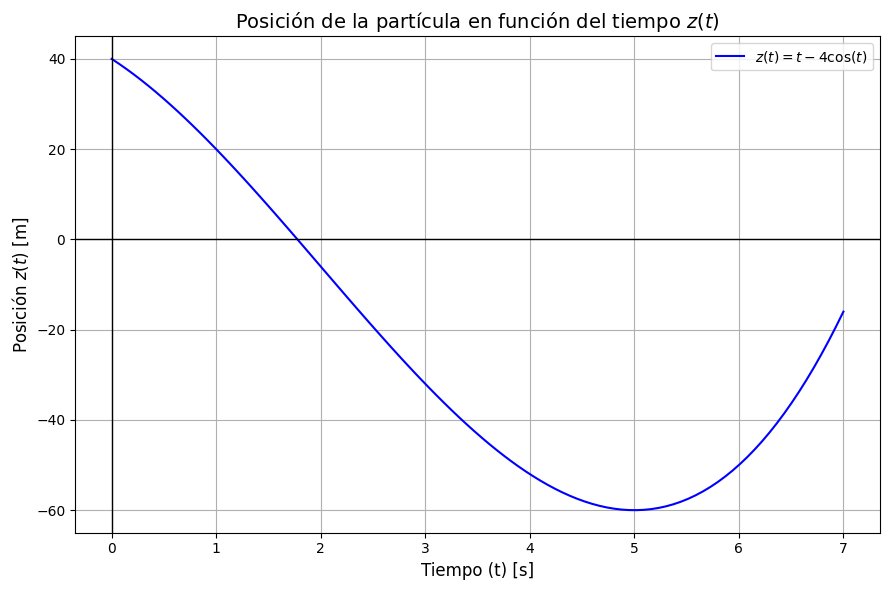

,Time [s],x(t) [m]
0,0.000000,40.000000
1,0.070707,38.909750
2,0.141414,37.761628
3,0.212121,36.557754
4,0.282828,35.300249
5,0.353535,33.991234
6,0.424242,32.632830
7,0.494949,31.227158
8,0.565657,29.776339
9,0.636364,28.282494


In [11]:
# First lets define the range: from 0 to 6 in t and divided in 100 spaces
t_values = np.linspace(0, 7, 100)

# Now lets write the function
def x(t):
  return t**3 - 6 * t**2 - 15 * t + 40

# Evalute the function on the time points
x_values = x(t_values)

# Now leta plot the function
# Create the canvas
plt.figure(figsize=(9,6))

# Plot the function
plt.plot(t_values, x_values,  label=r'$z(t) = t - 4 \cos(t)$', color='b')
plt.title(r'Posición de la partícula en función del tiempo $z(t)$', fontsize=14)
plt.xlabel('Tiempo (t) [s]', fontsize=12)
plt.ylabel('Posición $z(t)$ [m]', fontsize=12)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.tight_layout()
plt.show()

x_df = pd.DataFrame(
    {
    'Time [s]': t_values,
    'x(t) [m]': x_values
    }
)

x_df.head(10)

<font color= #ffcc00 size=5> 2.1 Analysis of the example: Using Simpy to derivate:  </font>
***
- One might be tempted to say that in the range between 0 and 5 seconds the slope is negative, and that would imply that the velocity is also negative since the slpe of the previous graphic is the velocity. So lets check if it's actually like that:




In [32]:
# First we need to define a variable that python will derivate in out case is t

t = sp.Symbol('t')

# Let's define the simbolic expression that we will derivate
x  = t**3 - 6 * t**2 - 15 * t + 40

# Calculate the derivate of the function
dx_dt = sp.diff(x,t)

display('The derivative of', Math(r' x(t) = ' + sp.latex(x)) ,Math(r' v_{x} = \frac{dx}{dt} = ' + sp.latex(dx_dt)))


'The derivative of'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<font color= #bb99ff size=5> 2.2 PLot the position and velocity together:  </font>
***

- For this we will transform the simbolic derivate we got into a function, and the evaluate that function of the velicity with all the time point from t = np.linespate(0, 6, 100)

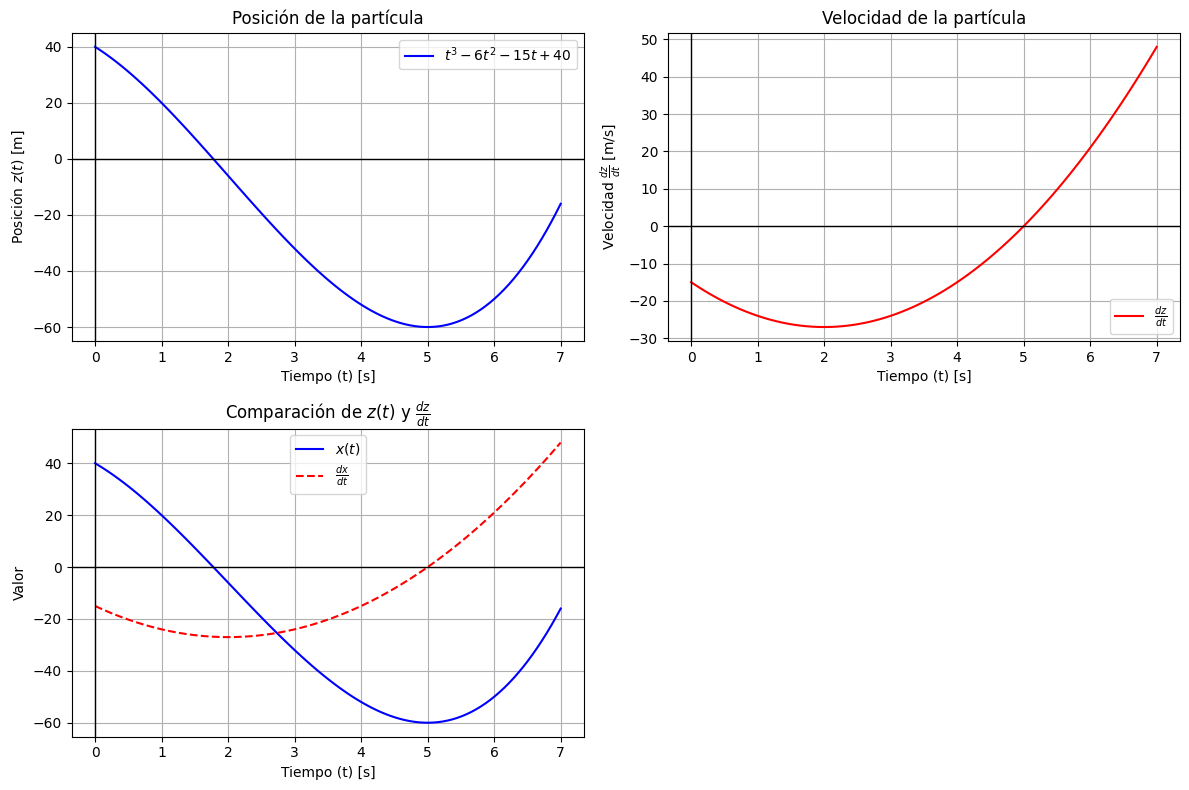

In [37]:
# Convertir expresiones simbólicas en funciones numéricas
x_func = sp.lambdify(t, x, 'numpy')
dx_dt_func = sp.lambdify(t, dx_dt, 'numpy')

# Evaluar las funciones en el rango dado
x_val = x_func(t_values)
dx_dt_val = dx_dt_func(t_values)

# Ajustar el tamaño de la figura para que sea más grande en Colab
plt.figure(figsize=(12, 8))  # Aumentamos el tamaño

# Gráfico de x(t)
plt.subplot(2, 2, 1)
plt.plot(t_values, x_val, label=r'$t^{3}−6t^{2}−15t+40$', color='b')
plt.title('Posición de la partícula')
plt.xlabel('Tiempo (t) [s]')
plt.ylabel('Posición $z(t)$ [m]')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()

# Gráfico de dz/dt
plt.subplot(2, 2, 2)
plt.plot(t_values, dx_dt_val, label=r"$\frac{dz}{dt}$", color='r')
plt.title('Velocidad de la partícula')
plt.xlabel('Tiempo (t) [s]')
plt.ylabel(r'Velocidad $\frac{dz}{dt}$ [m/s]')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()

# Superposición de la función y su derivada
plt.subplot(2, 2, 3)
plt.plot(t_values, x_val, label=r'$x(t)$', color='b')
plt.plot(t_values, dx_dt_val, label=r"$\frac{dx}{dt}$", color='r', linestyle='dashed')
plt.title(r'Comparación de $z(t)$ y $\frac{dz}{dt}$')
plt.xlabel('Tiempo (t) [s]')
plt.ylabel('Valor')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()

plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()


<font color= #80dfff size=5> 2.3 Plot the position, velocity and aceleration together:  </font>
***








In [49]:
# First we need to define a variable that python will derivate in out case is t

t = sp.Symbol('t')

# Let's define the simbolic expression that we will derivate
x  = t**3 - 6 * t**2 - 15 * t + 40

# Calculate the derivate of the function
v_x = sp.diff(x,t)
a_x = sp.diff(v_x,t)

display('The position funciton is', Math(r' x(t) = ' + sp.latex(x)) ,'The derivate of position is' ,Math(r' v_{x} = \frac{dx}{dt} = ' + sp.latex(v_x)), 'The derivative of velocity is: ', Math(r' a(t) = \frac{dv}{dt} = ' + sp.latex(a_x)))


'The position funciton is'

<IPython.core.display.Math object>

'The derivate of position is'

<IPython.core.display.Math object>

'The derivative of velocity is: '

<IPython.core.display.Math object>

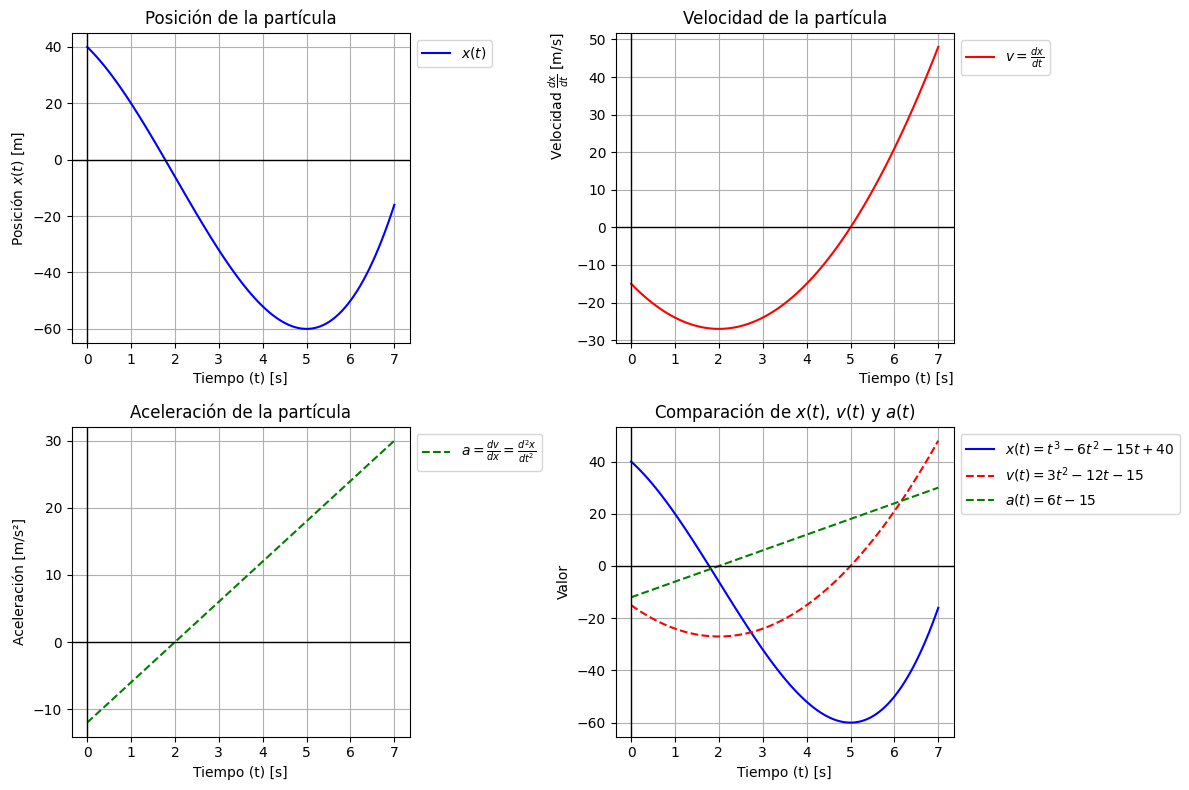

In [61]:
v_x_func = sp.lambdify(t, v_x, 'numpy')
a_x_func = sp.lambdify(t, a_x, 'numpy')

# Evaluar las funciones en el rango dado
v_val = v_x_func(t_values)
a_val = a_x_func(t_values)

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Gráfico de x(t)
plt.subplot(2, 2, 1)
plt.plot(t_values, x_val, label=r'$x(t)$', color='b')
plt.title('Posición de la partícula')
plt.xlabel('Tiempo (t) [s]')
plt.ylabel('Posición $x(t)$ [m]')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 📌 Leyenda a la derecha

# Gráfico de v = dx/dt
plt.subplot(2, 2, 2)
plt.plot(t_values, v_val, label=r"$v = \frac{dx}{dt}$", color='r')
plt.title('Velocidad de la partícula')
plt.xlabel('Tiempo (t) [s]', loc='right')
plt.ylabel(r'Velocidad $\frac{dx}{dt}$ [m/s]', loc='top')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 📌 Leyenda a la derecha

# Gráfico de a = dv/dt
plt.subplot(2, 2, 3)
plt.plot(t_values, a_val, label=r"$a = \frac{dv}{dx} = \frac{d^2x}{dt^2}$", color='g', linestyle='dashed')
plt.title('Aceleración de la partícula')
plt.xlabel('Tiempo (t) [s]')
plt.ylabel('Aceleración [m/s²]')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 📌 Leyenda a la derecha

# Superposición de la función y sus derivadas
plt.subplot(2, 2, 4)
plt.plot(t_values, x_val, label=r'$x(t)  = t^{3}−6t^{2}−15t+40 $', color='b')
plt.plot(t_values, v_val, label=r"$v(t)  = 3t^{2}−12t−15 $", color='r', linestyle='dashed')
plt.plot(t_values, a_val, label=r"$a(t)  = 6t - 15 $", color='g', linestyle='dashed')
plt.title(r'Comparación de $x(t)$, $v(t)$ y $a(t)$')
plt.xlabel('Tiempo (t) [s]')
plt.ylabel('Valor')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 📌 Leyenda a la derecha

plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()

<font color= #e6b800 size=5> 2.3 Conclusion and Analysis: Why does the velocity change slope at two points while position has only one critical point?  </font>
***


- Understanding the Behavior of Each Function

  - We have:

    - Position function:
  $$x(t)=t^{3}−6t^{2}−15^{t}+40$$
    - Velocity function (first derivative x(t)):
  $$v(t)=\frac{dx}{dt}=3t^{2}−12t−15$$
    - Acceleration function (second derivative of x(t)):
  $$a(t)= \frac{dv}{dt}=6t−12$$
    
- Why does the velocity change slope at two points while position has only one critical point?    

  - Position x(t) and its slope:
      The slope of x(t) is given by the velocity v(t). If v(t)>0, x(t) is increasing; if v(t) < 0, x(t) is decreasing.

  - x(t) has a critical point (local minimum or maximum) where v(t)=0, which occurs at:

$$
  3t^{2}−12t−15=0
$$
    - Solving this quadratic equation:

  $$
    t = \frac{12 \pm \sqrt{144+180}}{6} = \frac{12 \pm 18}{6}
  $$
    - t=5 or t=−1. Since we're usually interested in positive t, we focus on t=5, which is where the position changes direction.

- Velocity v(t) and its slope:
    - The slope of v(t) is given by acceleration a(t). The key observation is that v(t) has two critical points:

    - First zero crossing (velocity changes from negative to positive):
      This means the particle was moving left (or downward) and then started moving right (or upward). This happens at t=5.

    - Second slope change: The velocity function is a parabola, so it has a point where it switches from concave down to concave up. This occurs at the vertex of the parabola:    
      $$
        t = -\frac{b}{2a} = -\frac{-12}{2 \cdot 3} = 2
      $$
    - So at t=2, the velocity reaches its most negative value, and then it starts increasing.   

- Acceleration a(t) is linear:
  The second derivative a(t)=6t−12a(t)=6t−12 is a straight line because it is a linear function of tt.    